## Final Project Submission

Please fill out:
* Student name: Patel Pinalben Nikhilkumar
* Student pace: part time 
* Scheduled project review date/time: 14/02/2023
* Instructor name: Hardik



# Introduction 
A plethora of details regarding the cost, size, location, condition, and a number of other characteristics of houses in Washington's King County can be found in the King County House Dataset. I'll describe how I created a multi linear regression model in Python in this article to forecast home prices.

# Business Problem

RGB real estate agency is an agency in King County that deals with clients who want to buy houses, sell the house help them to renovate their houses, so they can have good price.

They intend to develop a program and utilize it to the development of a housing price model:
   1) The model's main objective is to forecast home purchase and sale prices.
   2) The key purpose is to identify characteristics or attributes that have a big impact on how much a residence costs.
 
By completing this project,the company is in a better position to give advice to their clients who wants to buy or sell their homes, heir costs or selling prices and exactly why their prices are as they are.


 

# Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Gatting data from
df= pd.read_csv('data/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Cleaning


Checking duplicates and missing values

In [6]:
# Check duplicates
df.duplicated().sum() 
# check nan values
df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [8]:
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [9]:
print(df['yr_renovated'].value_counts())

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [10]:
# Now let's create the function to fill missing values to 0
data = df.fillna(value = 0)

In [11]:
data              

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
data.shape

(21597, 21)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [15]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Dropping Some columns

## In project description they recommend us to ignore some or all of the columns that we are not going to use in this project.  The columns we are droping is:- 
    *  view
    *  sqft_above
    *  zipcode
    *  lat
    *  long
    *  sqft_living15
    *  sqft_lot15
    *  id
    *  Date

In [16]:
df1 = data.drop(columns = ['id','date', 'view', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated' ])

In [17]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004


In [18]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built'],
      dtype='object')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.8+ MB


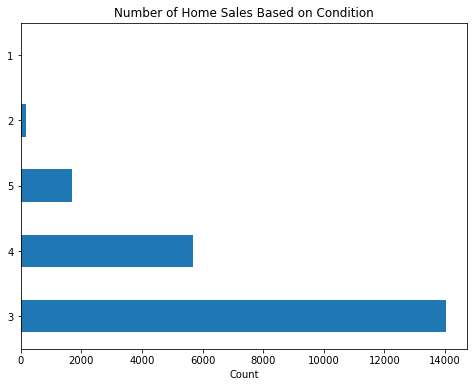

In [20]:
fig, ax = plt.subplots(figsize = (8,6))

df1['condition'].value_counts().plot(kind='barh')
ax.set_title('Number of Home Sales Based on Condition')
ax.set_xlabel('Count');

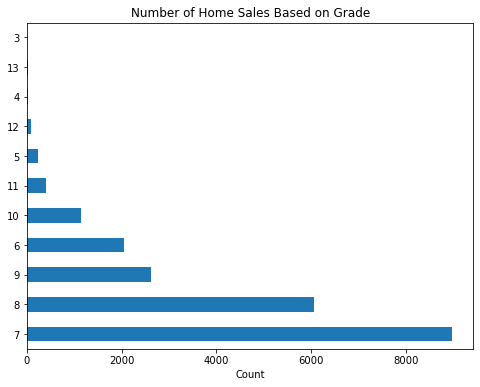

In [21]:
fig, ax = plt.subplots(figsize = (8,6))

df1['grade'].value_counts().plot(kind='barh')
ax.set_title('Number of Home Sales Based on Grade')
ax.set_xlabel('Count');

# Checking the Continues and Categorical Variables

let's plot Histogram to see continues ans Categorical Values

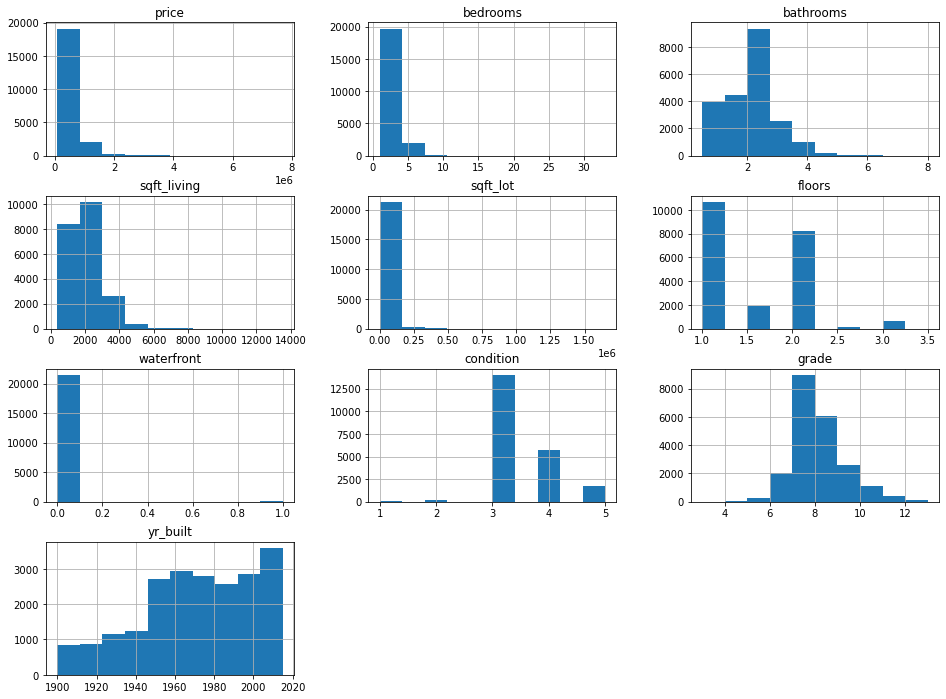

In [22]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
df1.hist(ax = ax);


Many of the variables do not follow a normal distribution, and the scales are dramatically different for some variables. This may create issues with satisfying all regression assumptions, but we'll address those issues as they arise. Regression does not require features to be normally distributed.

## We can observe that the categorical columns are:

* bathrooms
* floors
* view
* condition

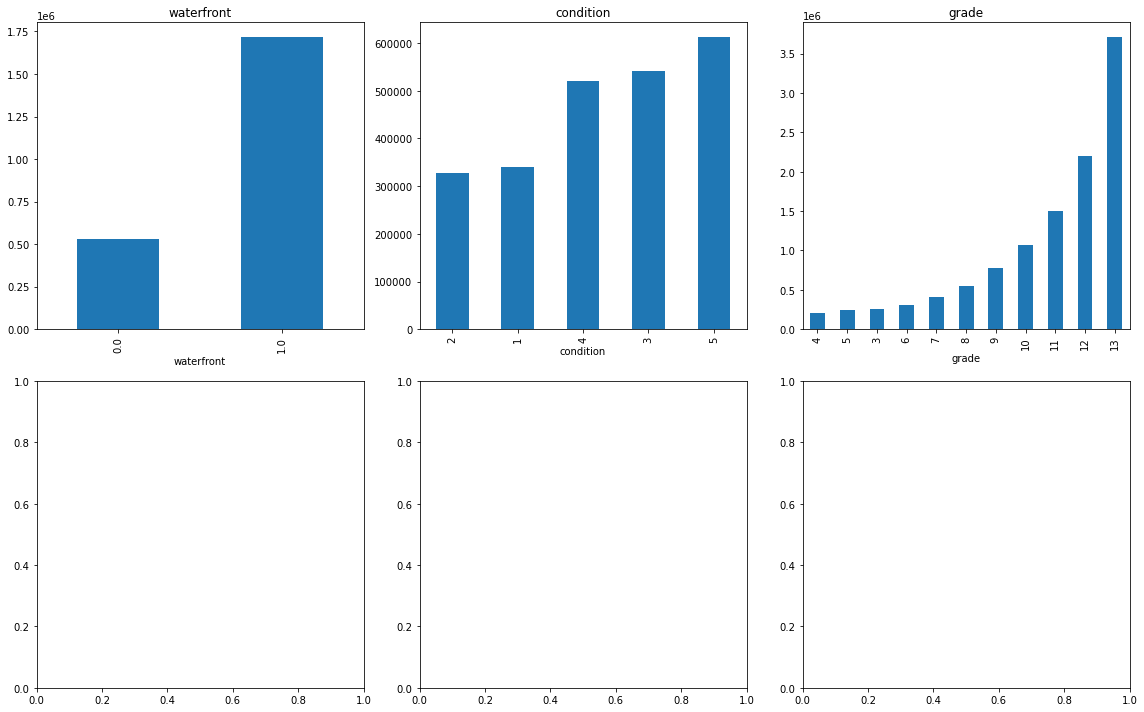

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))

categoricals = ['waterfront', 'condition', 'grade', ]

for col, ax in zip(categoricals, axes.flatten()):
    (df1.groupby(col)              # group values together by column of interest
        .mean()['price']            # take the mean of the saleprice for each group
        .sort_values()              # sort the groups in ascending order
        .plot
        .bar(ax = ax))                # create a bar graph on the ax
    
    ax.set_title(col)               # Make the title the name of the column
    
fig.tight_layout()

In [24]:
# Let's remove the 'price' outliers in the top 5% of the observations

kcdf = df1.query('price < price.quantile(.95)')

In [25]:
kcdf.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933


In [26]:
kcdf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.051300e+04,20513.000000,20513.000000,20513.000000,2.051300e+04,20513.000000,20513.000000,20513.000000,20513.000000,20513.000000
mean,4.791037e+05,3.334276,2.055514,1981.343879,1.466203e+04,1.476527,0.002632,3.406474,7.537903,1970.841320
std,2.112197e+05,0.910827,0.712861,781.962556,4.017872e+04,0.536588,0.051241,0.646936,1.043487,29.164756
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.390000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1974.000000
75%,6.050000e+05,4.000000,2.500000,2440.000000,1.034900e+04,2.000000,0.000000,4.000000,8.000000,1996.000000
max,1.150000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,5.000000,12.000000,2015.000000


# Exploratory Correlations
* We are showing correlation and using regression coefficients in this analysis to be able to show the relationship between one or more features with sale price.

* Using regression and interpreting correlation coefficients is effective for this business problem because it will allow for us to determine how sale price is impacted by different features and to what degree.

* Building complex models with multiple features allows for us to be able to make more accurate, data-driven predictions.

In [27]:
kcdf_corrs = kcdf.corr()['price'].map(abs).sort_values(ascending = False)
kcdf_corrs

price          1.000000
grade          0.635934
sqft_living    0.627438
bathrooms      0.460266
bedrooms       0.298955
floors         0.273616
sqft_lot       0.097296
yr_built       0.063956
waterfront     0.055232
condition      0.035714
Name: price, dtype: float64

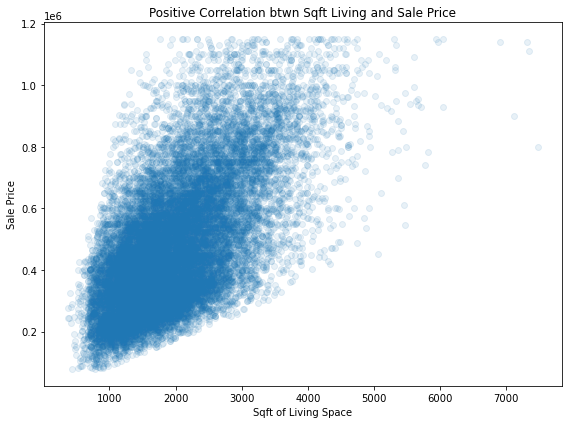

In [28]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(kcdf['sqft_living'], kcdf['price'], alpha = .1)
ax.set_xlabel('Sqft of Living Space')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation btwn Sqft Living and Sale Price')

plt.tight_layout()

# The strongest correlations with other predictor variables?

In the section below, we create objects for the variables that stand a good chance of being used in the model.

In [29]:
price = kcdf['price']
bath = kcdf['bathrooms']
bed = kcdf['bedrooms']
floors = kcdf['floors']
sqft_living = kcdf['sqft_living']
sqft_lot = kcdf['sqft_lot']
waterfront = kcdf['waterfront']
yr_built = kcdf['yr_built']

We'll now make some scatterplots to visually explore the relationship between these variables and price. Linear regression analysis also assumes that the relationship between explanatory and response variables is linear.



<Figure size 432x288 with 0 Axes>

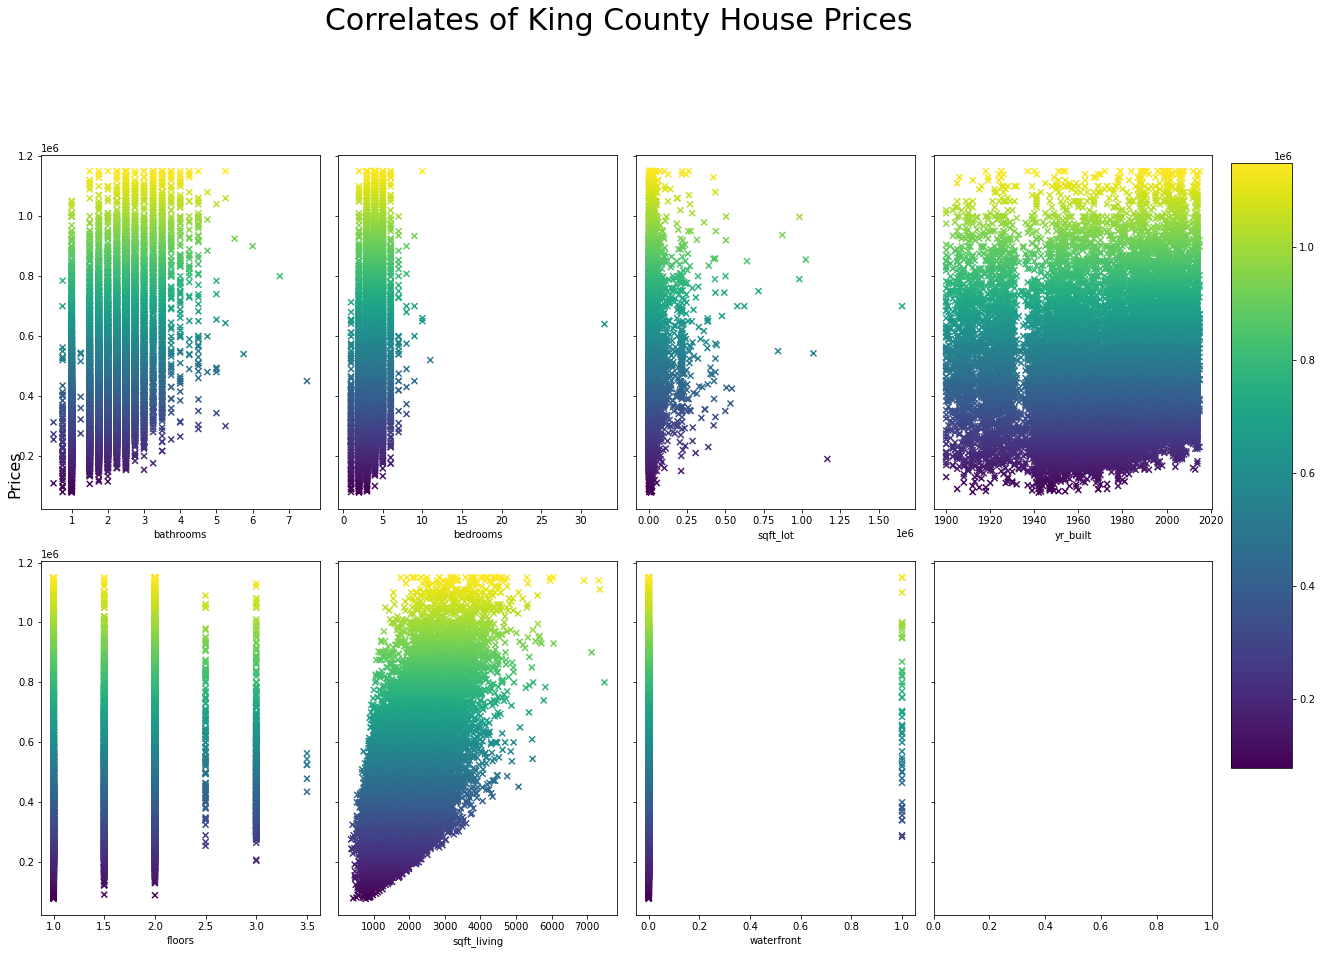

In [30]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, )
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, )

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('bedrooms')

axes[1][0].scatter(floors, price, c = price, marker = "x")
axes[1][0].set_xlabel('floors')

axes[1][1].scatter(sqft_living, price, c = price, marker = "x")
axes[1][1].set_xlabel('sqft_living')

axes[0][2].scatter(sqft_lot, price, c = price, marker = "x")
axes[0][2].set_xlabel('sqft_lot')

axes[1][2].scatter(waterfront, price, c = price, marker = "x")
axes[1][2].set_xlabel('waterfront')

sc = axes[0][3].scatter(yr_built, price, c = price, marker = "x")
axes[0][3].set_xlabel('yr_built')



cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

There is no obvious linear correlation between the variables "floors," and "bedrooms" and the cost of a home. Sqft living will be employed in the multiple regression model because it has a better linear association with pricing than sqft lot.

In [31]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, )
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

While the ultimate goal of this project is to develop a multiple regression model for predicting price, we'll select final features by starting with feature-wise simple linear regression.

There are 3 assumptions about the data that must be checked before building any simple linear regression model:

* There should be a linear relationship between the explanatory and response variables (already checked).
* The data should be homoscedastic (i.e., the residuals have equal variance around the regression line on a scatterplot).
* The model residuals should follow a normal distribution (i.e. the residuals fall along a relatively straight line on a QQ plot.

<Figure size 432x288 with 0 Axes>

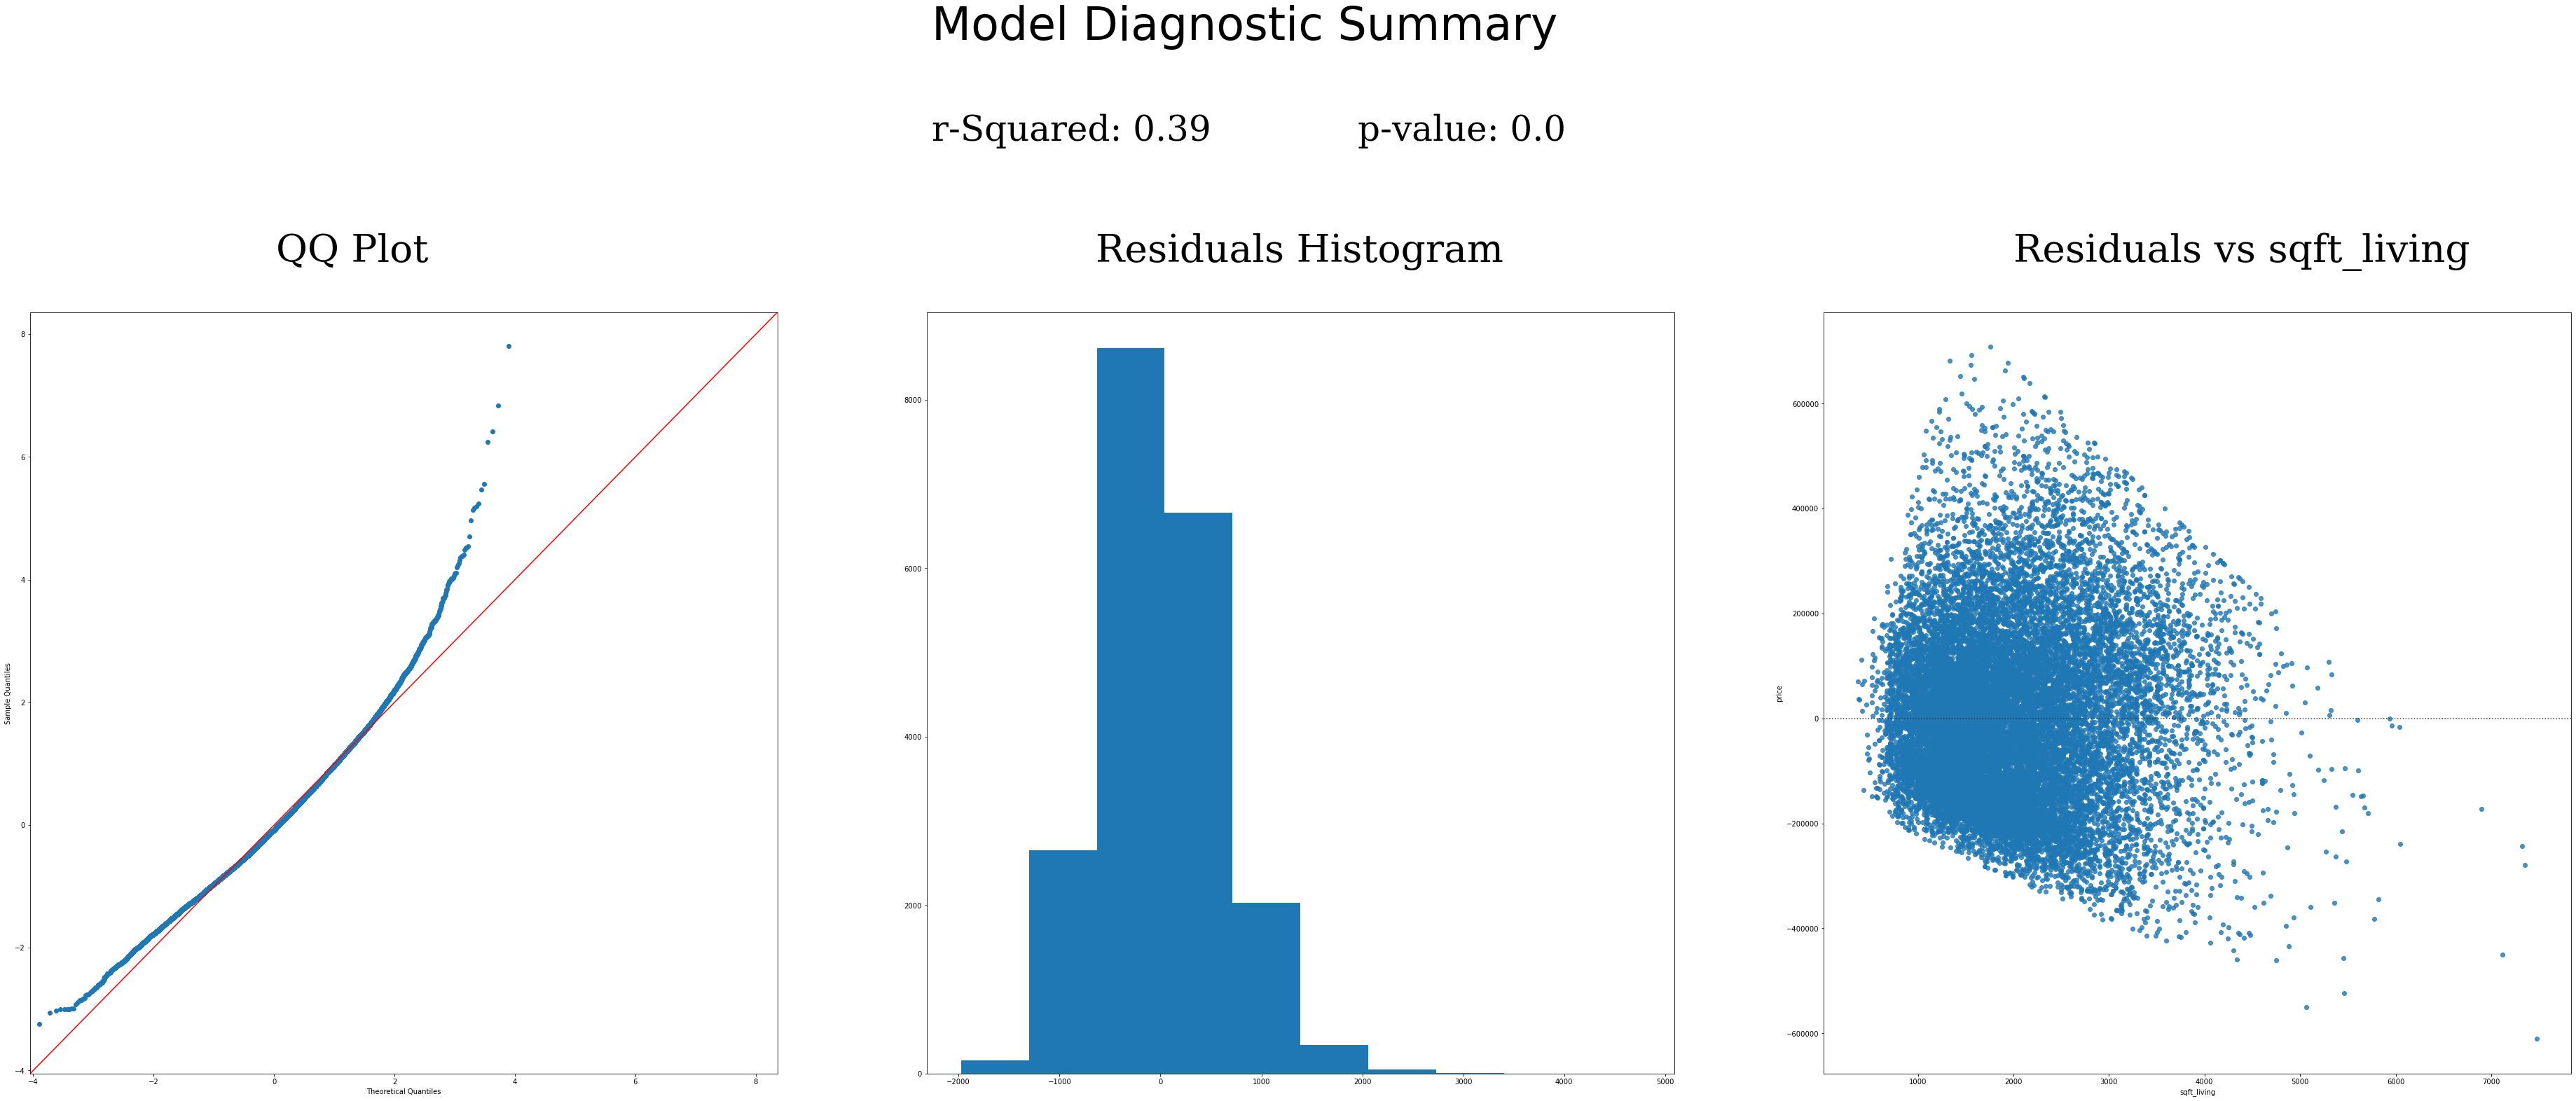

In [32]:
f = 'sqft_living~price'
sqft_living_model = smf.ols(formula=f, data=kcdf).fit()
model_diagnostic(sqft_living_model, kcdf['sqft_living'], 'sqft_living', price)


<Figure size 432x288 with 0 Axes>

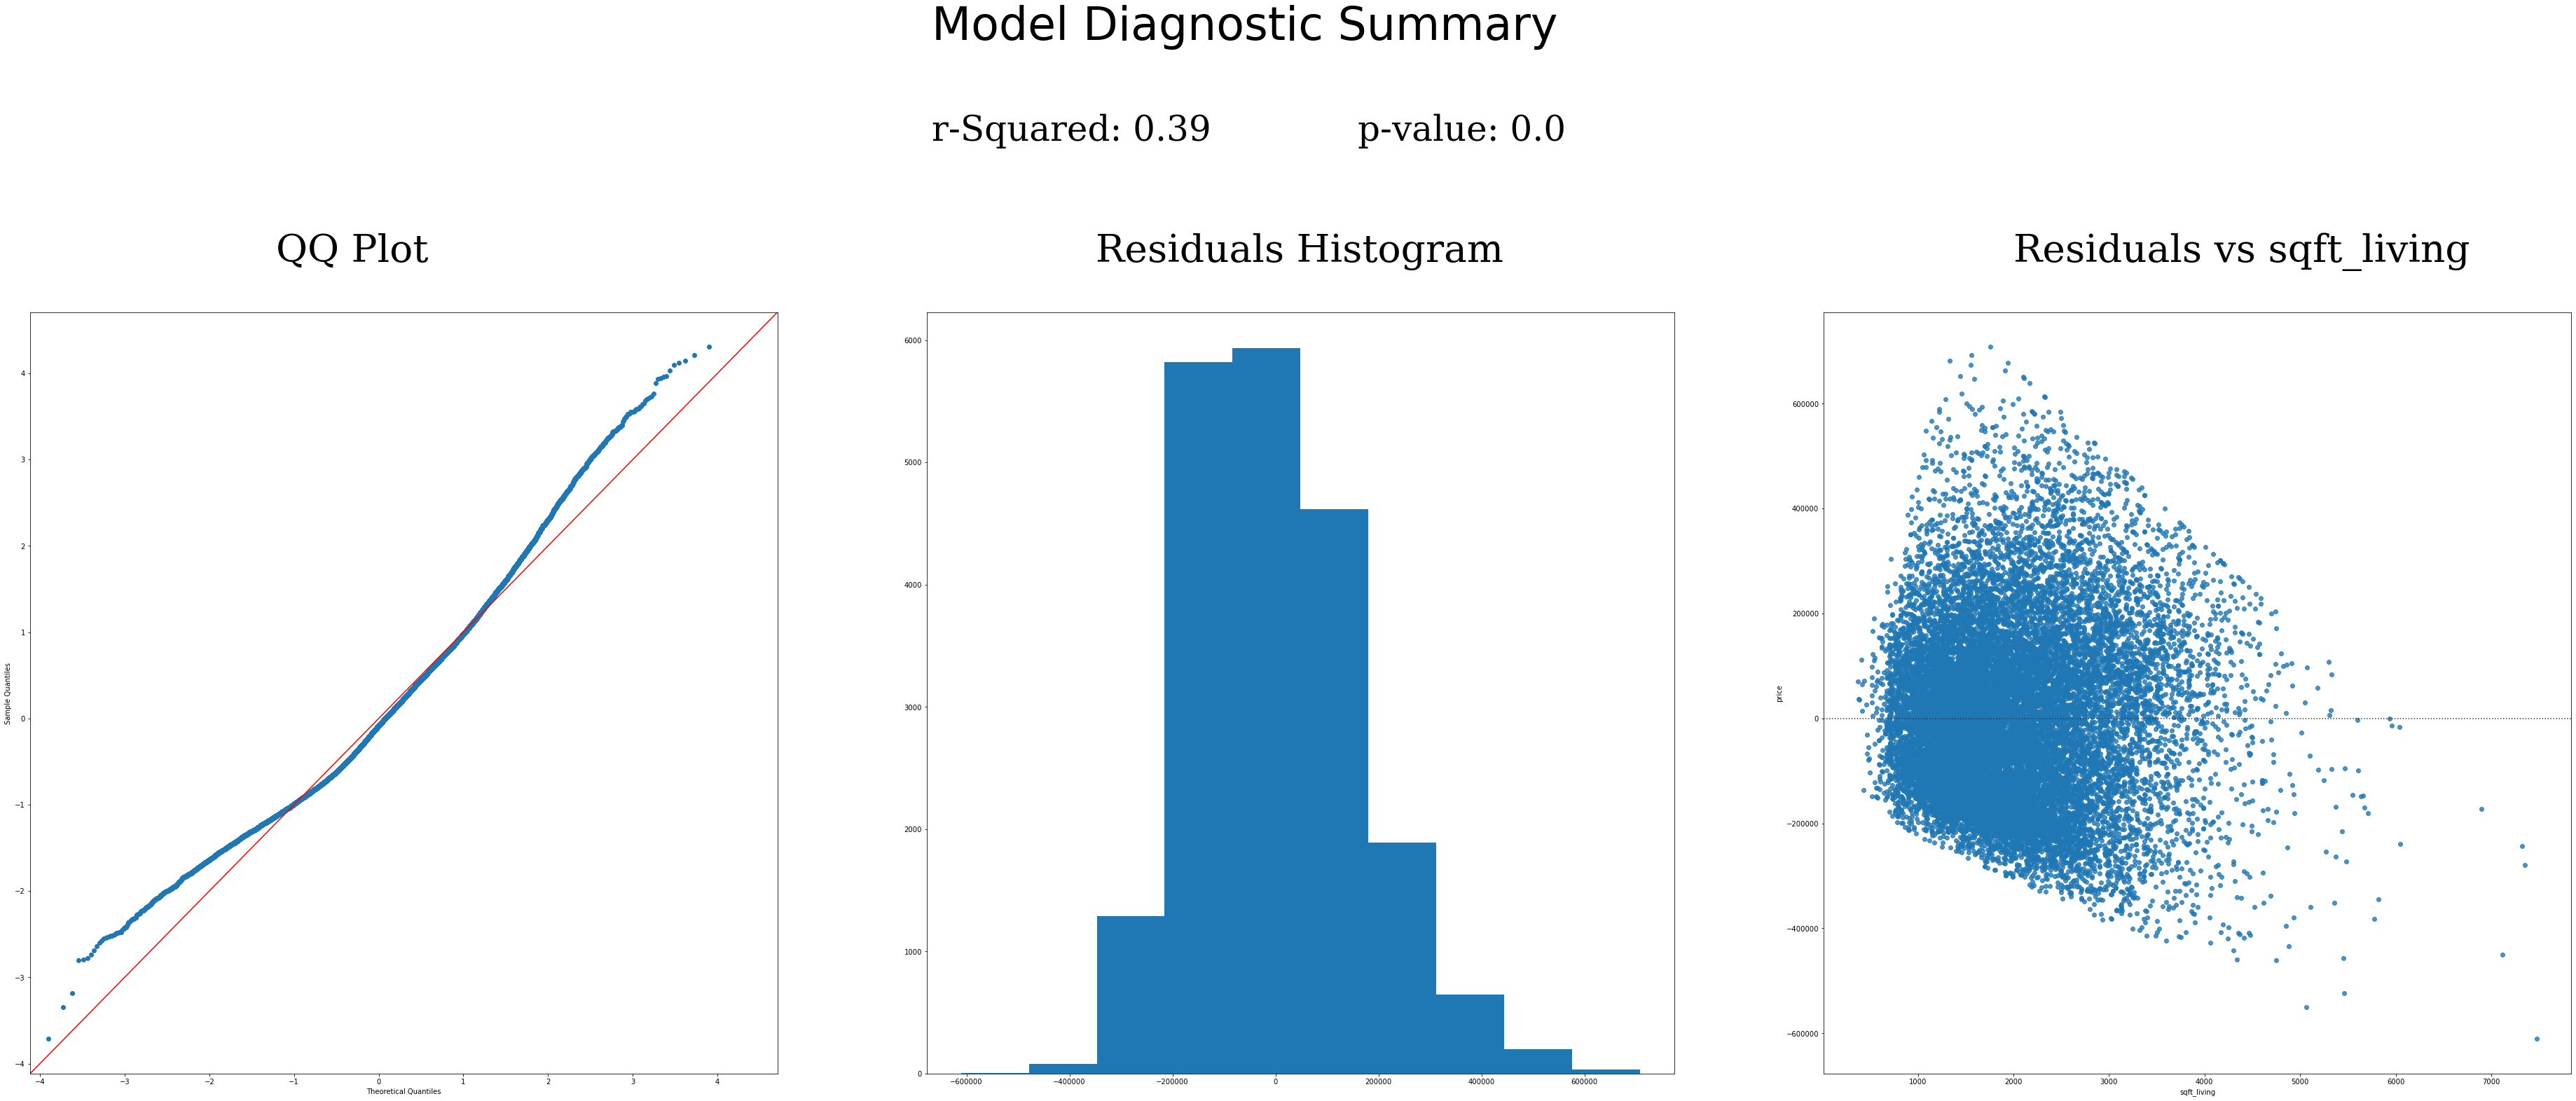

In [33]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=kcdf).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)


<Figure size 432x288 with 0 Axes>

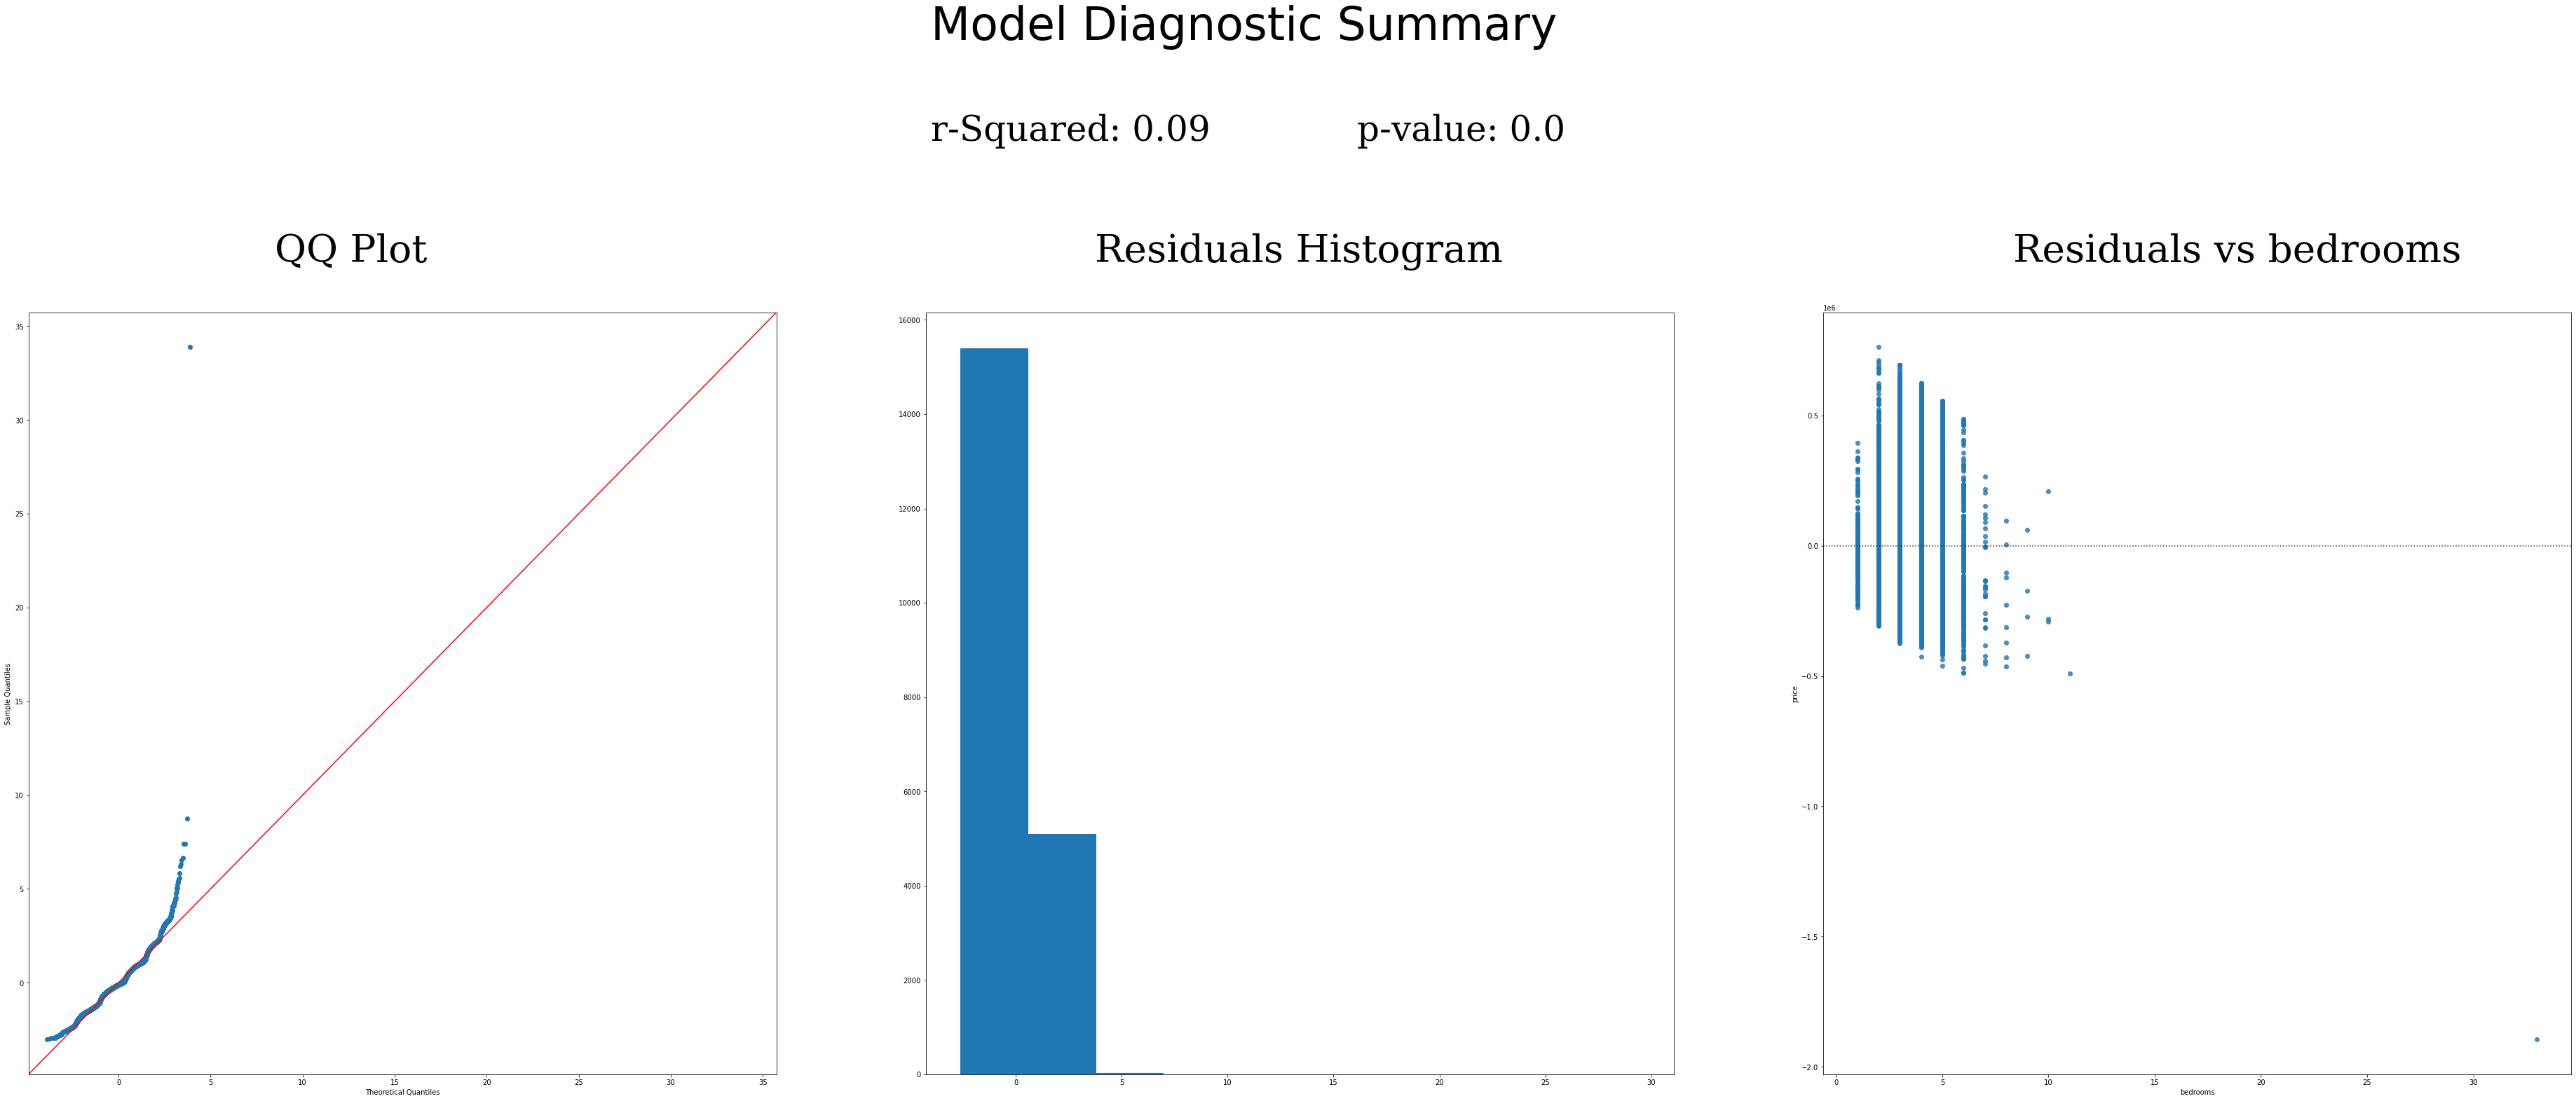

In [34]:
f = 'bedrooms~price'
bed_model = smf.ols(formula=f, data=kcdf).fit()
model_diagnostic(bed_model, kcdf['bedrooms'], 'bedrooms', price)


<Figure size 432x288 with 0 Axes>

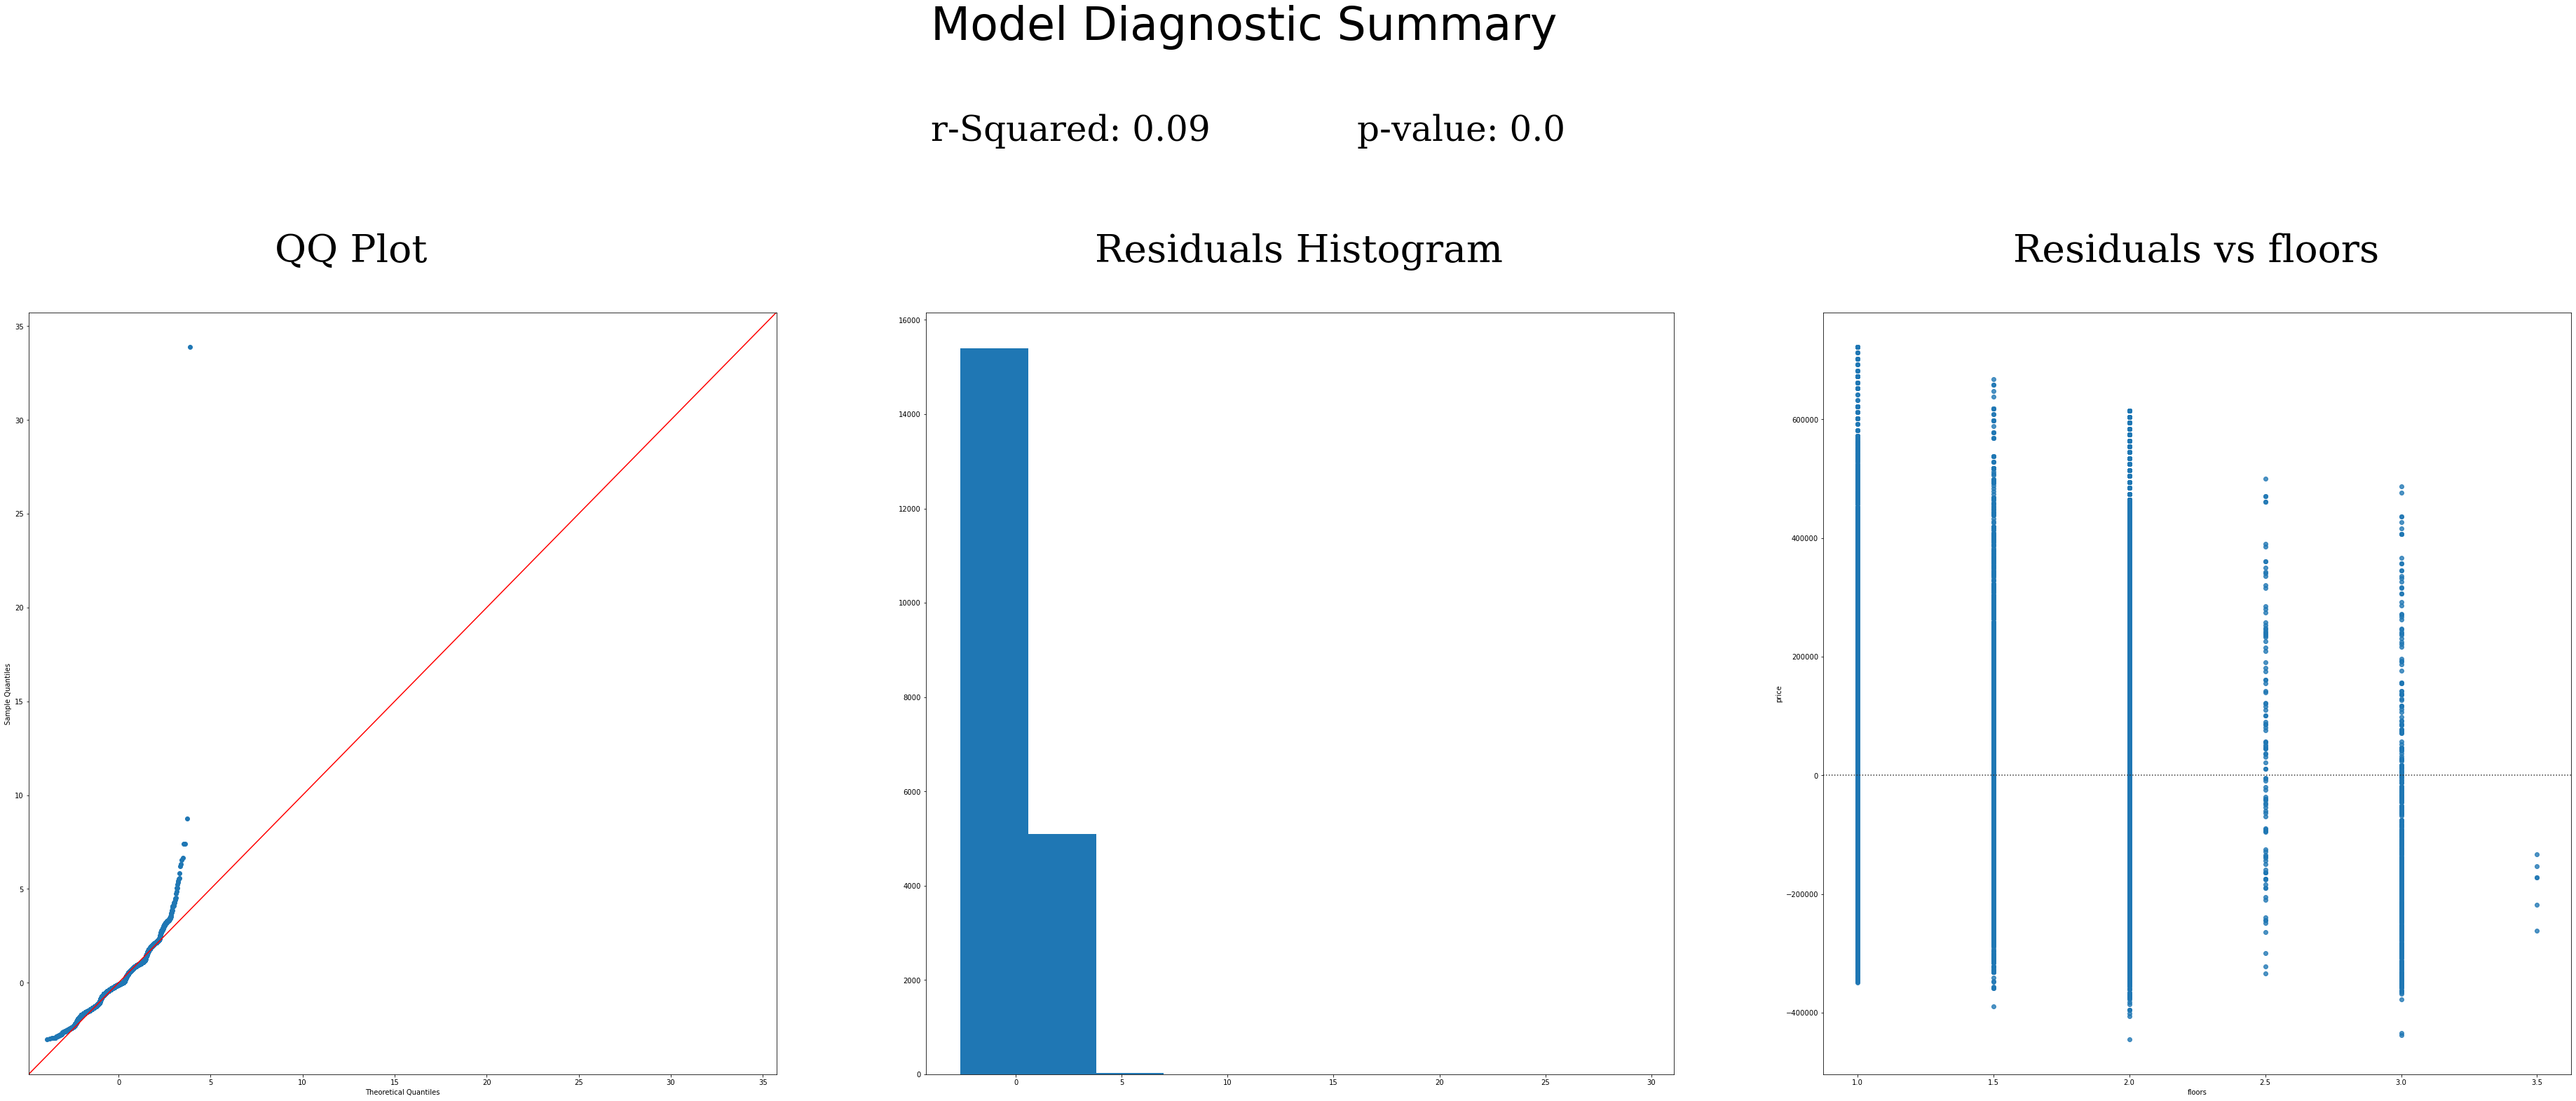

In [35]:
floors = 'floors~price'
floors_model = smf.ols(formula=f, data=kcdf).fit()
model_diagnostic(floors_model, kcdf['floors'], 'floors', price)

<Figure size 432x288 with 0 Axes>

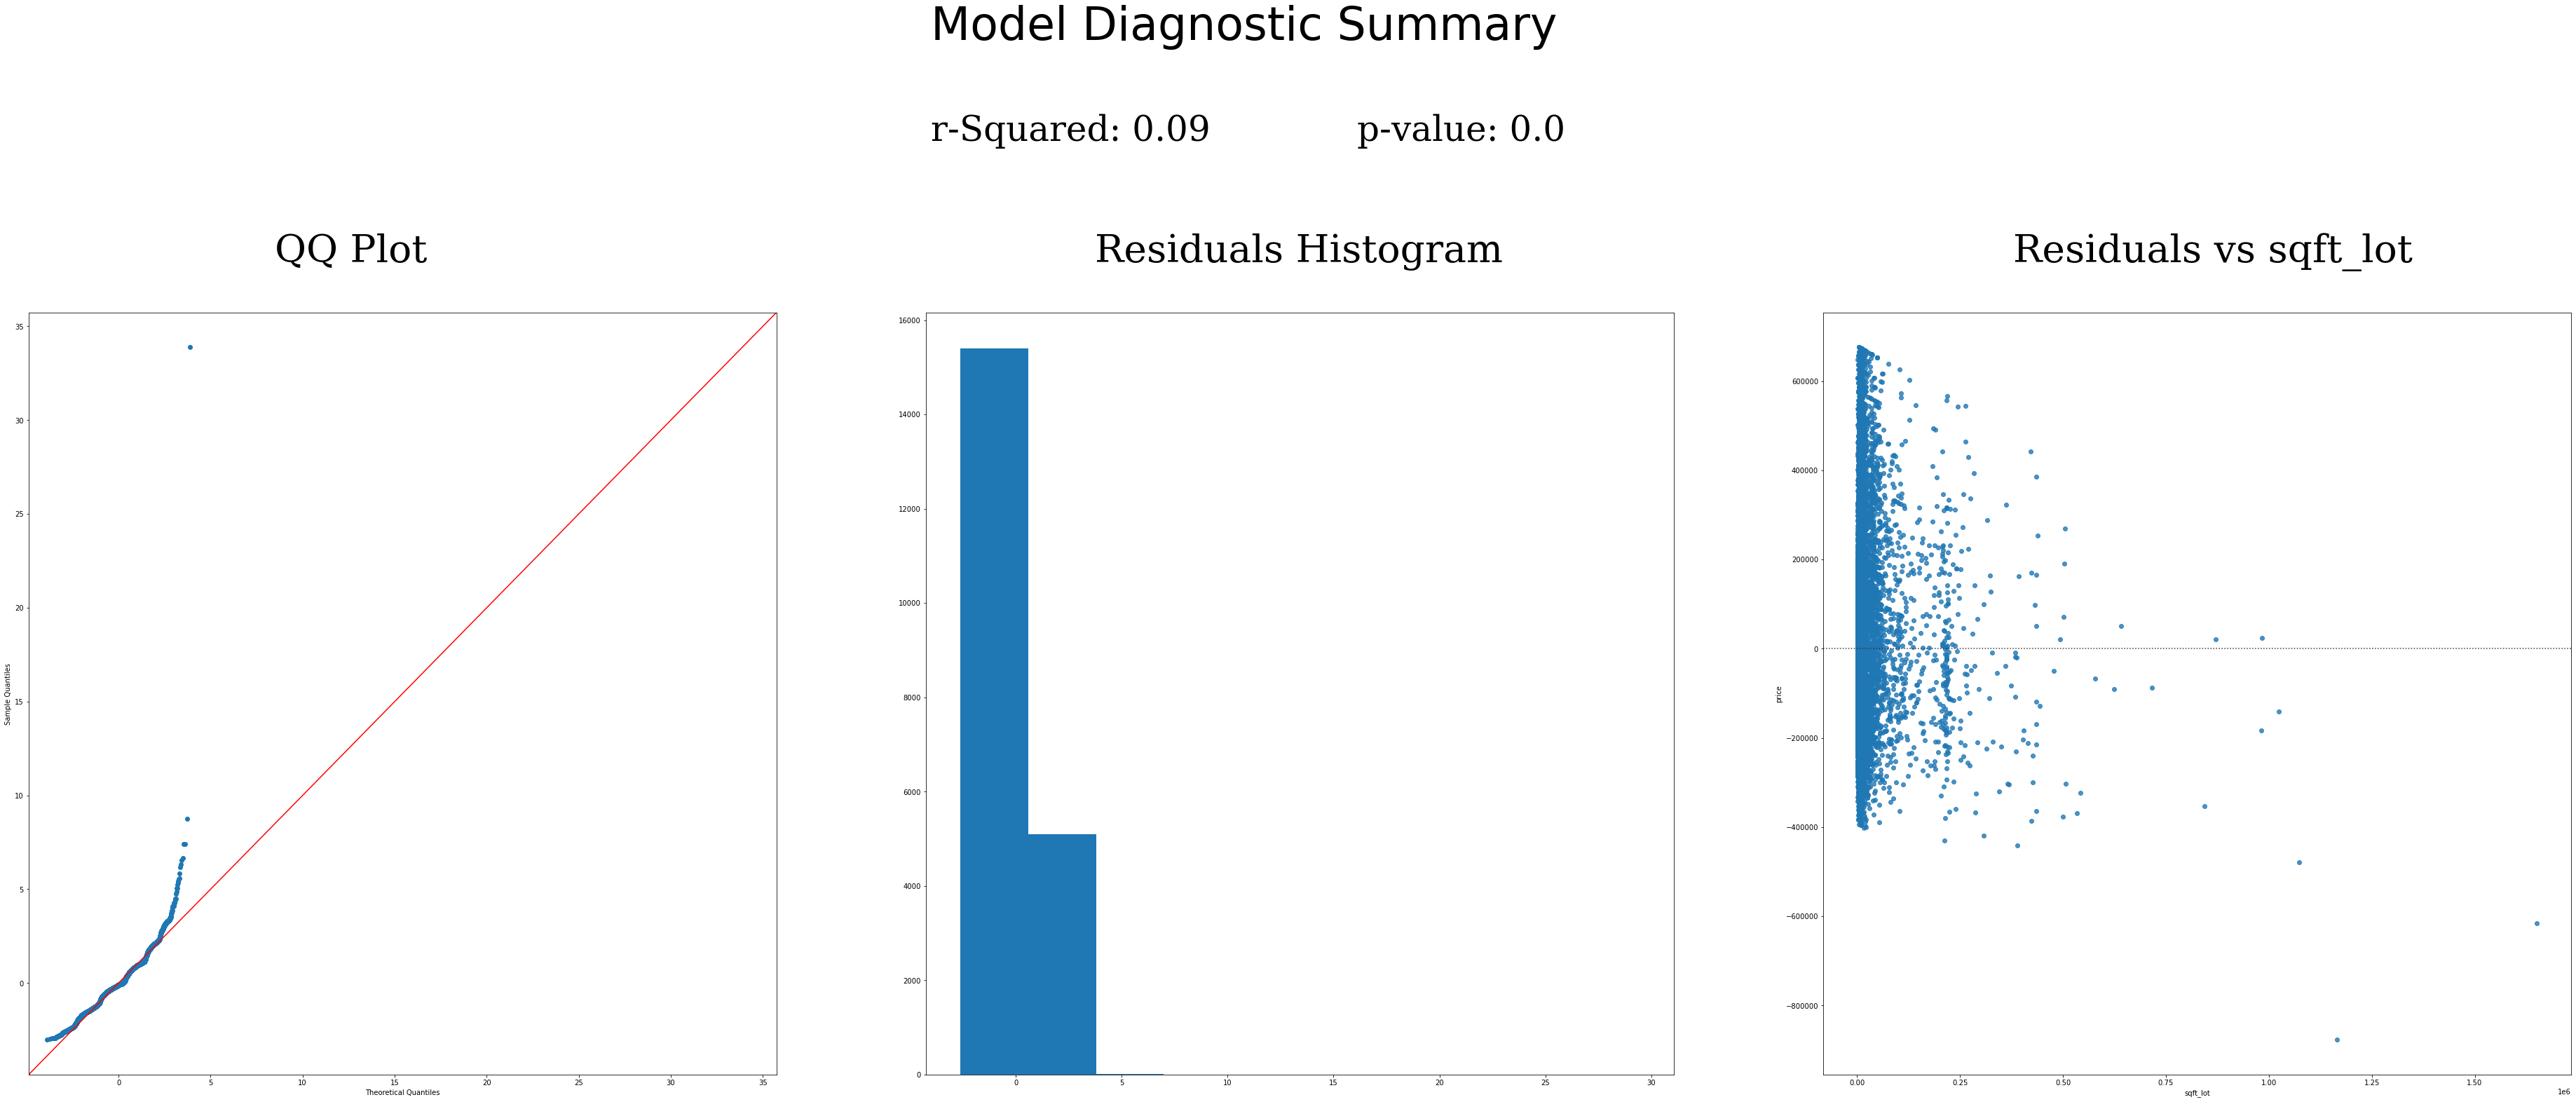

In [36]:
sqft_lot = 'sqft_lot~price'
sqft_lot_model = smf.ols(formula=f, data=kcdf).fit()
model_diagnostic(sqft_lot_model, kcdf['sqft_lot'], 'sqft_lot', price)

<Figure size 432x288 with 0 Axes>

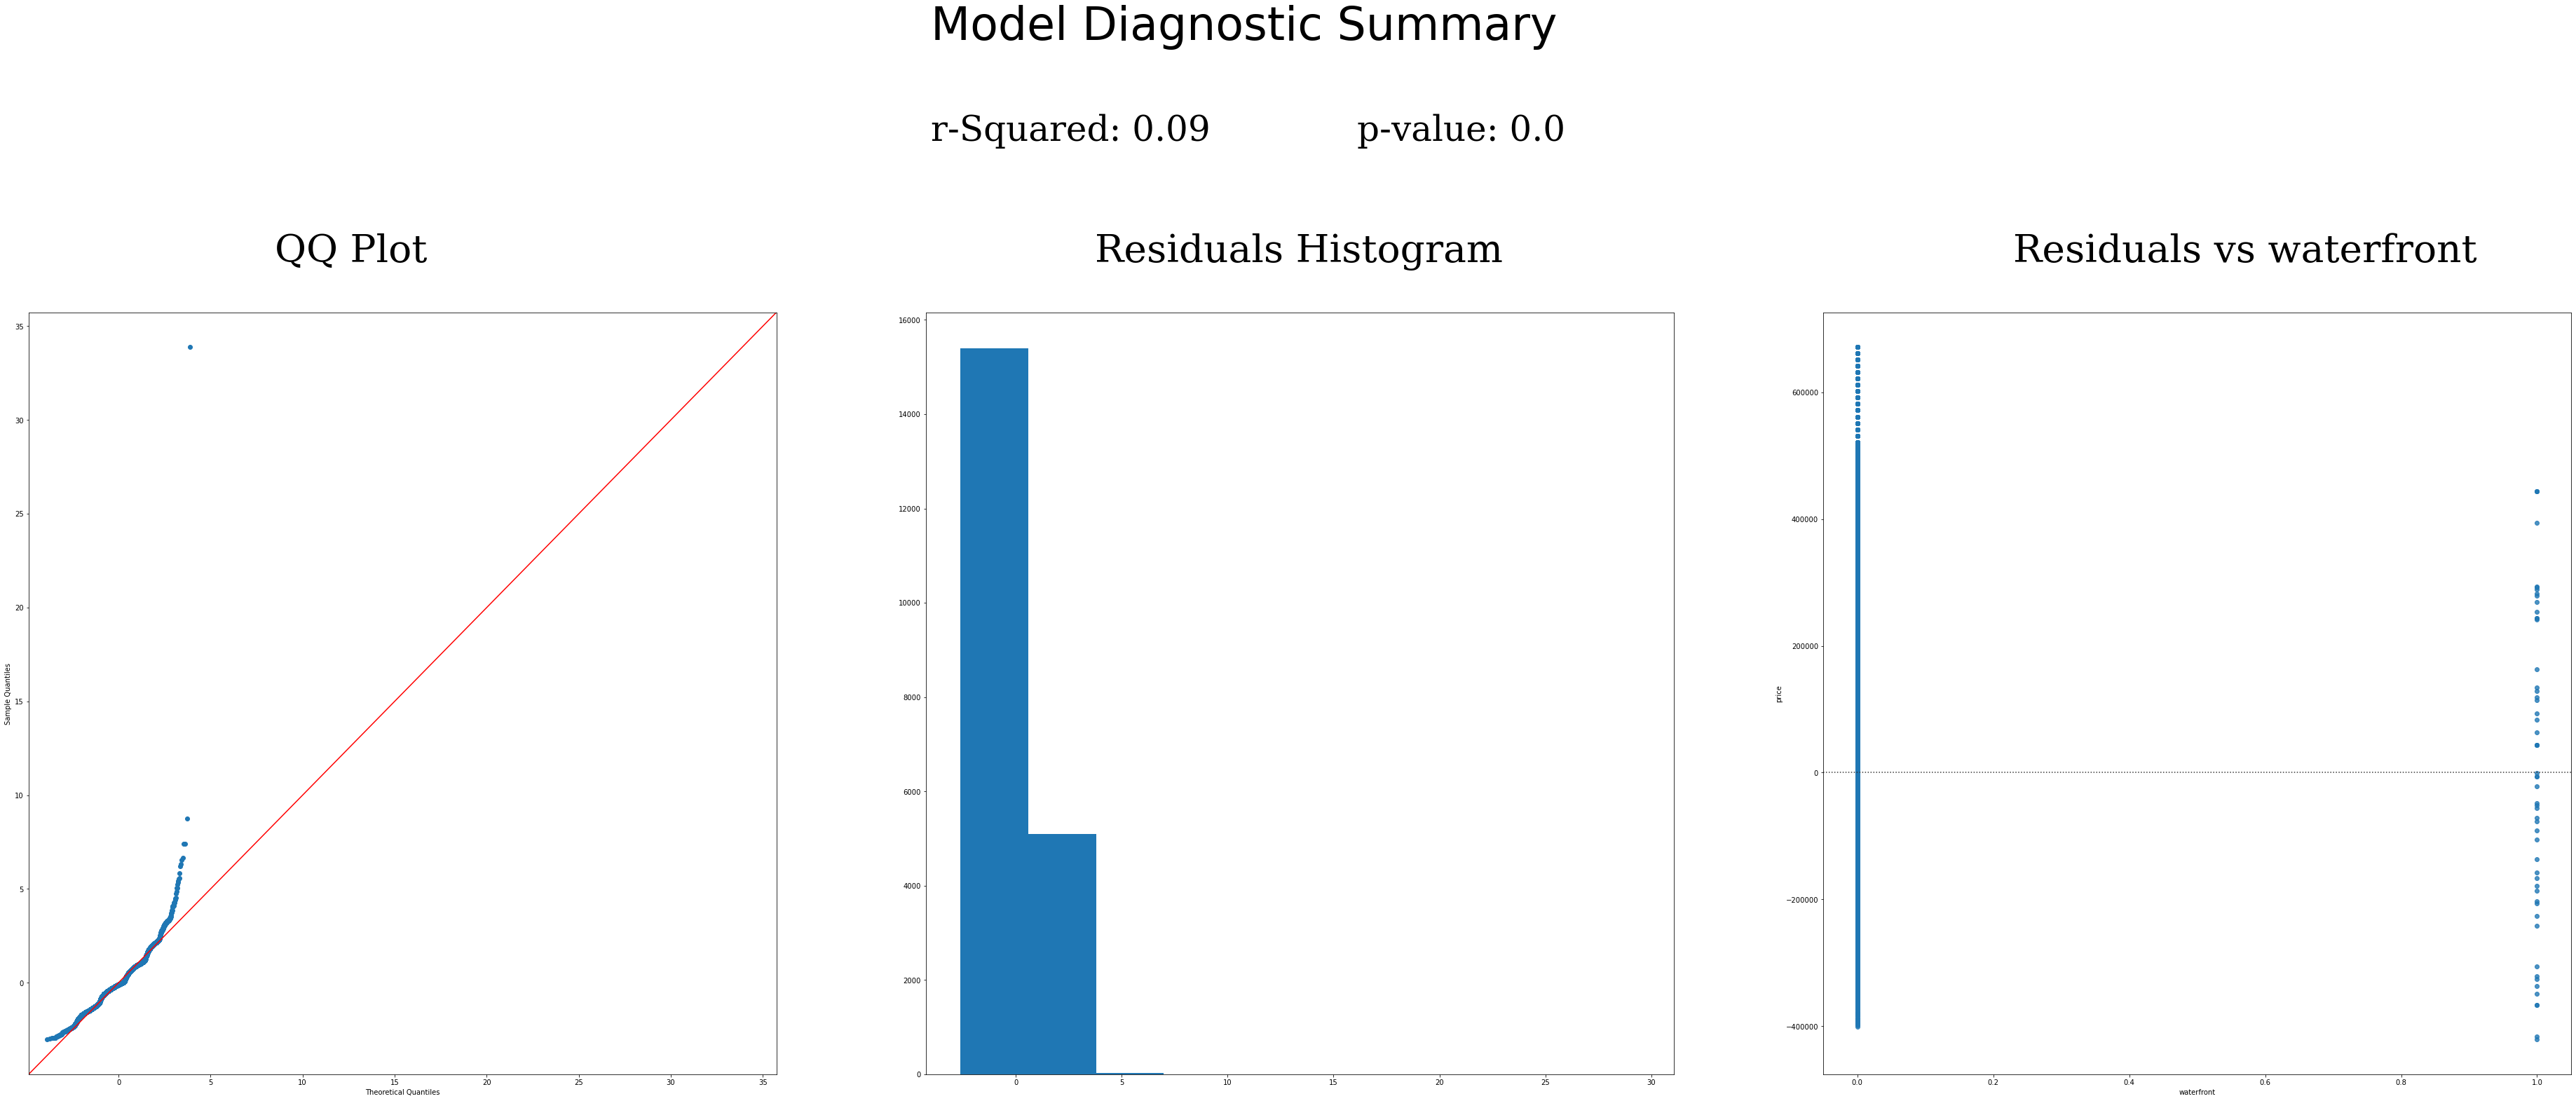

In [37]:
waterfront = 'waterfront~price'
waterfront_model = smf.ols(formula=f, data=kcdf).fit()
model_diagnostic(waterfront_model, kcdf['waterfront'], 'waterfront', price)

## Checking Correlations and Multicollinearity

We're interested in finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. However, one of the presumptions of a multiple linear regression model is that the explanatory variables are not multicollinear (i.e., they cannot be accurately predicted by other explanatory factors). To see correlations between price and continuous variables in the dataset, see the correlation matrix we've created below.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'bathrooms'),
  Text(0, 3.5, 'sqft_living'),
  Text(0, 4.5, 'sqft_lot'),
  Text(0, 5.5, 'floors'),
  Text(0, 6.5, 'waterfront'),
  Text(0, 7.5, 'condition'),
  Text(0, 8.5, 'grade'),
  Text(0, 9.5, 'yr_built')])

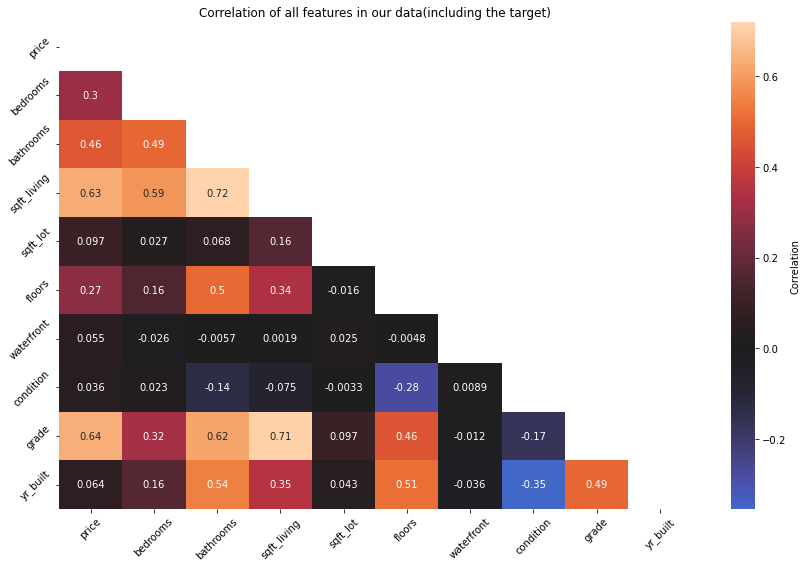

In [38]:
corrs = kcdf.corr()

# Set figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_tight_layout(True)

# Plot the heatmap
sns.heatmap(
    # Data for plotting
    corrs, 
    # Axis to plot on
    ax=ax, 
    # Show correlation values
    annot=True,
    # To set a diverging color gradient
    center=0,
    # Get rid of the other half of duplicates
    mask=np.triu(np.ones_like(corrs, dtype=bool)),
    # Set name of key/legend
    cbar_kws={"label": "Correlation"}
)

# Set the figure title
ax.set_title('Correlation of all features in our data(including the target)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)


In [39]:
# let's check correlation in betwwn the variable
corrs['price'].sort_values(ascending = False)

price          1.000000
grade          0.635934
sqft_living    0.627438
bathrooms      0.460266
bedrooms       0.298955
floors         0.273616
sqft_lot       0.097296
yr_built       0.063956
waterfront     0.055232
condition      0.035714
Name: price, dtype: float64

In [40]:
kcdf_features = kcdf.drop('price', axis = 1)
corrs_features = kcdf_features.corr()
a = corrs_features.abs().stack().reset_index().sort_values(0,ascending = False)
a['pairs'] = list(zip(a.level_0, a.level_1))
a.drop(columns=['level_1', 'level_0'], inplace = True)
a.set_index(['pairs'],inplace = True)
a.columns = ['cc']
a.drop_duplicates(inplace = True)
a[(a.cc>0.70) & (a.cc<1)]

,cc
pairs,
"(bathrooms, sqft_living)",0.718648
"(sqft_living, grade)",0.709002


Addressing multicollinearity is important to ensure our models are accurate and analyses are not noisy with highly correlated pairs clouding interpretations. Since the square foot of a home's living area and the square footage of a home in general are collinear, our models will not include condition, bedrooms, and more.

# Model Testing
## Model One (Base Line)

In [165]:
import statsmodels.formula.api as smf
Model_1 = smf.ols(formula="price ~ grade + bathrooms + floors + sqft_living + sqft_lot", data=df).fit()
Model_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5074.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:07:43   Log-Likelihood:            -2.9900e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21591   BIC:                         5.981e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.043e+05   1.33e+04    -45.532      0.000    -6.3e+05   -5.78e+05
grade        1.102e+05   2364.951     46.615      0.000    1.06e+05    1.15e+05
bathrooms   -2.774e+04   3668.828     -7.561      0.000   -3.49e+04   -2.05e+04
floors      -3.629e+04   3767.245     -9.632      0.000   -4.37e+04   -2.89e+04
sqft_living   200.7841      3.414     58.814      0.000     194.093     207.476
sqft_lot       -0.2899      0.042     -6.950      0.000      -0.372      -0.208
==============================================================================
Omnibus:                    16758.487   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           977214.214
Skew:                           3.246   Prob(JB):                         0.00
Kurtosis:                      35.308   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations 

* The R-squared value is 0.54i.e. means using 54% of variable, and it's looks good.
* The Prob (F-statistic) is 0.00
* All of the p-values round to 0, which means we can reject the null hypothesis
 
 ## let's check Q-Q Plots for linearity check

In [166]:
import scipy.stats as stats
plt.style.use('ggplot')

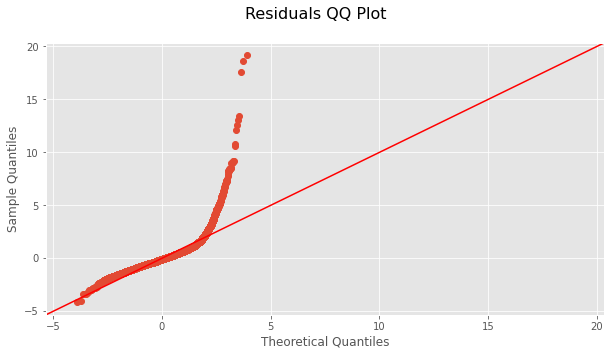

In [167]:
residuals = Model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

Q-Q plots dosn't looks good. let's check hetroscadaticity for all variable.

Now we can able to say that after seen all the plots, there were some of the columns that not supporting the model.
So let's droup that columns and create some dummy variables.

In [46]:
# Dropping some more columns 
df2 = df1.drop(columns = ['yr_built','grade', 'bathrooms' ])

In [47]:
df2.head(5)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement
0,221900.0,3,1180,5650,1.0,0.0,3,0.0
1,538000.0,3,2570,7242,2.0,0.0,3,400.0
2,180000.0,2,770,10000,1.0,0.0,3,0.0
3,604000.0,4,1960,5000,1.0,0.0,5,910.0
4,510000.0,3,1680,8080,1.0,0.0,3,0.0


In [55]:
df2_pred = df2.iloc[:,0:8]
df2_pred.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement
0,221900.0,3,1180,5650,1.0,0.0,3,0.0
1,538000.0,3,2570,7242,2.0,0.0,3,400.0
2,180000.0,2,770,10000,1.0,0.0,3,0.0
3,604000.0,4,1960,5000,1.0,0.0,5,910.0
4,510000.0,3,1680,8080,1.0,0.0,3,0.0


# Creating dummy variables for each categorical and doing
 # Log-transforming and feature scaling 

In [61]:
df2_log = pd.DataFrame([])
sqft_basement = df2_pred['sqft_basement']
df2_log['logbedrooms'] = np.log(df2_pred['bedrooms'])
df2_log['logsqft_living'] = np.log(df2_pred['sqft_living'])
df2_log['logsqft_lot'] = np.log(df2_pred['sqft_lot'])
df2_log['logfloors'] = np.log(df2_pred['floors'])
df2_log['logcondition'] = np.log(df2_pred['condition'])
df2_log['logwaterfront'] = np.log(df2_pred['waterfront'])
df2_log['logprice'] = np.log(df2_pred['price'])




In [62]:
logbedrooms = df2_log['logbedrooms']
logsqft_living = df2_log['logsqft_living']
logsqft_lot = df2_log['logsqft_lot']
logfloors = df2_log['logfloors']
logcondition = df2_log['logcondition']
logwaterfront = df2_log['logwaterfront']
logprice = df2_log['logprice']





In [63]:
scaled_bedrooms = (logbedrooms - np.mean(logbedrooms)) / np.sqrt(np.var(logbedrooms))
scaled_sqft_living = (logsqft_living - np.mean(logsqft_living)) / np.sqrt(np.var(logsqft_living))
scaled_sqft_lot = (logsqft_lot - np.mean(logsqft_lot)) / np.sqrt(np.var(logsqft_lot))
scaled_floors = (logfloors - np.mean(logfloors)) / np.sqrt(np.var(logfloors))
scaled_condition = (logcondition - np.mean(logcondition)) / np.sqrt(np.var(logcondition))
scaled_waterfront = (logwaterfront - np.mean(logwaterfront)) / np.sqrt(np.var(logwaterfront))
scaled_price = (logprice - np.mean(logprice)) / np.sqrt(np.var(logprice))


In [64]:
df2_cont_scaled = pd.DataFrame([])
df2_cont_scaled['bedrooms'] = scaled_bedrooms
df2_cont_scaled['sqft_living'] = scaled_sqft_living
df2_cont_scaled['sqft_lot'] = scaled_sqft_lot
df2_cont_scaled['floors'] = scaled_floors
df2_cont_scaled['condition'] = scaled_condition
df2_cont_scaled['waterfront'] = scaled_waterfront
df2_cont_scaled['price'] = scaled_price



In [65]:

data_fin = pd.concat([price, scaled_bedrooms, scaled_sqft_living, scaled_sqft_lot, scaled_floors, scaled_waterfront], axis=1)



In [66]:
df2_ols = pd.concat([price, scaled_bedrooms, scaled_sqft_living, scaled_sqft_lot, scaled_floors,], axis=1)
df2_ols.head(3)

,price,logbedrooms,logsqft_living,logsqft_lot,logfloors
0,221900.0,-0.279725,-1.125582,-0.388439,-0.960874
1,538000.0,-0.279725,0.709463,-0.113243,1.006854
2,180000.0,-1.711651,-2.131943,0.244481,-0.960874


In [171]:
df2_ols.columns

Index(['price', 'logbedrooms', 'logsqft_living', 'logsqft_lot', 'logfloors'], dtype='object')

In [172]:
df2_ols

,price,logbedrooms,logsqft_living,logsqft_lot,logfloors
0,221900.0,0,-1,0,0
1,538000.0,0,0,0,1
2,180000.0,-1,-2,0,0
3,604000.0,0,0,0,0
4,510000.0,0,0,0,0
...,...,...,...,...,...
21552,NaN,0,1,0,1
21560,NaN,1,2,0,1
21574,NaN,0,2,0,0
21581,NaN,0,1,0,1


In [173]:
outcome = 'price'
predictors = df2_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [174]:
model2= ols(formula=formula, data=df2_ols).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1954.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:12:58   Log-Likelihood:            -2.7730e+05
No. Observations:               20513   AIC:                         5.546e+05
Df Residuals:                   20508   BIC:                         5.546e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.684e+05   1715.741    273.019      0.000    4.65e+05    4.72e+05
logbedrooms     -1.43e+04   2264.130     -6.317      0.000   -1.87e+04   -9864.200
logsqft_living  1.634e+05   2504.224     65.243      0.000    1.58e+05    1.68e+05
logsqft_lot     1.723e+04   1850.716      9.308      0.000    1.36e+04    2.09e+04
logfloors       4.524e+04   2544.496     17.780      0.000    4.03e+04    5.02e+04
==============================================================================
Omnibus:                     1185.354   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1401.647
Skew:                           0.638   Prob(JB):                    4.33e-305
Kurtosis:                       3.104   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the model Adj. R-squared is only 40%, so let's check which variable is more supporting using stepwise_selection and build model again.

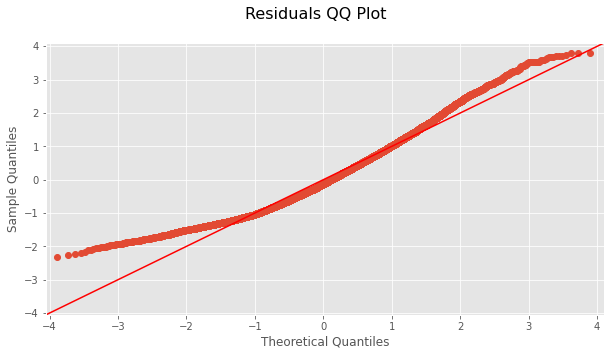

In [175]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

In [176]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [177]:
result = stepwise_selection(predictors, data_fin['price'], verbose=True)
print('resulting features:')
print(result)

resulting features:
[]


In [178]:
import statsmodels.formula.api as smf
outcome = 'price'
x_cols = ['logsqft_living', 'logbedrooms', 'logsqft_lot',]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=data).fit()
model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4653.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:13:14   Log-Likelihood:            -3.0201e+05
No. Observations:               21597   AIC:                         6.040e+05
Df Residuals:                   21593   BIC:                         6.041e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.851e+06   4.04e+04    -95.398      0.000   -3.93e+06   -3.77e+06
logsqft_living  6.379e+05   6257.574    101.941      0.000    6.26e+05     6.5e+05
logbedrooms    -2.201e+05   9037.172    -24.357      0.000   -2.38e+05   -2.02e+05
logsqft_lot    -1.845e+04   2285.168     -8.073      0.000   -2.29e+04    -1.4e+04
==============================================================================
Omnibus:                    19472.028   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1727015.243
Skew:                           3.993   Prob(JB):                         0.00
Kurtosis:                      46.074   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

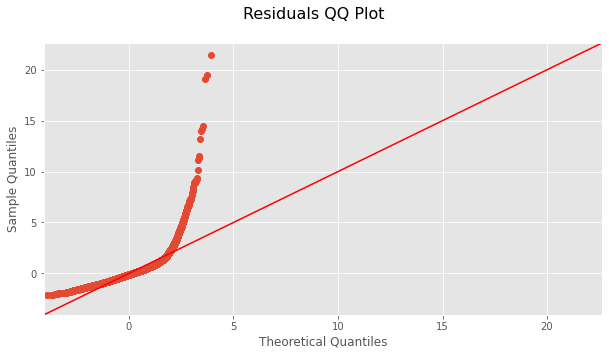

In [179]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

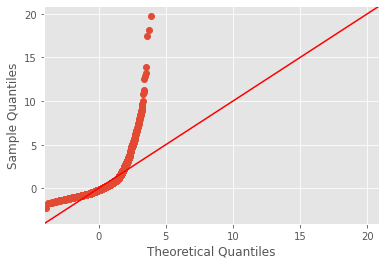

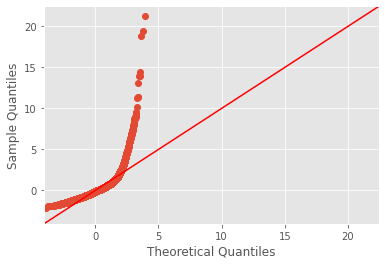

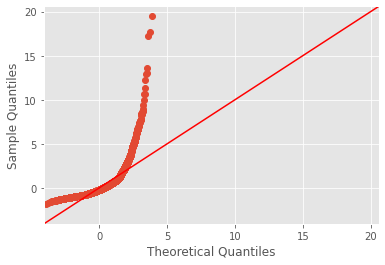

In [180]:
# Normality Check (Q-Q plots)
f = 'price~logbedrooms'
f3 = 'price~logsqft_living'
f4 = 'price~logsqft_lot'

model = smf.ols(formula=f, data=data).fit()
model3 = smf.ols(formula=f3, data=data).fit()
model4 = smf.ols(formula=f4, data=data).fit()


resid1 = model.resid
resid3 = model3.resid
resid4 = model4.resid


fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'bathrooms'),
  Text(0, 3.5, 'sqft_living'),
  Text(0, 4.5, 'sqft_lot'),
  Text(0, 5.5, 'floors'),
  Text(0, 6.5, 'waterfront'),
  Text(0, 7.5, 'condition'),
  Text(0, 8.5, 'grade'),
  Text(0, 9.5, 'yr_built')])

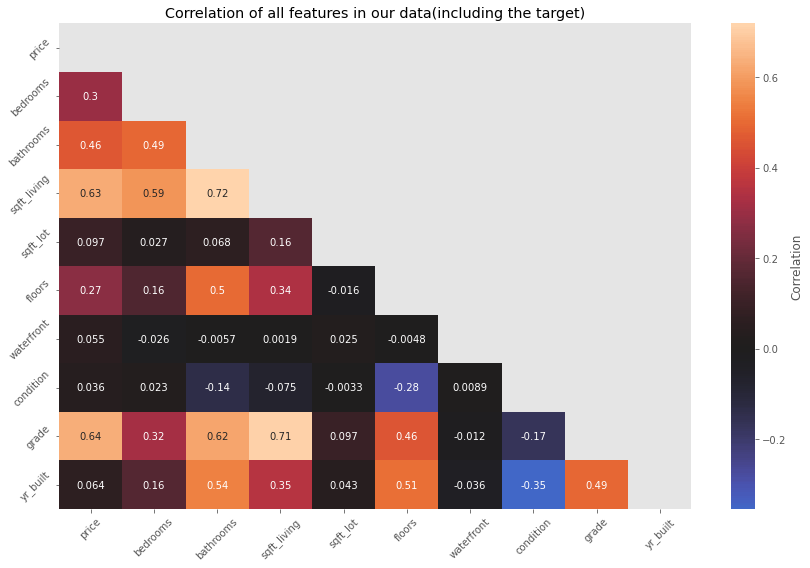

In [181]:
corrs1 = df2_ols.corr()

# Set figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_tight_layout(True)

# Plot the heatmap
sns.heatmap(
    # Data for plotting
    corrs, 
    # Axis to plot on
    ax=ax, 
    # Show correlation values
    annot=True,
    # To set a diverging color gradient
    center=0,
    # Get rid of the other half of duplicates
    mask=np.triu(np.ones_like(corrs, dtype=bool)),
    # Set name of key/legend
    cbar_kws={"label": "Correlation"}
)

# Set the figure title
ax.set_title('Correlation of all features in our data(including the target)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [182]:
corrs1['price'].sort_values(ascending = False)

price             1.000000
logsqft_living    0.512209
logfloors         0.248939
logbedrooms       0.215107
logsqft_lot       0.126503
Name: price, dtype: float64

In [148]:
df2_ols_features = df2_ols.drop('price', axis = 1)
corrs1_features = df2_ols_features.corr()
a = corrs1_features.abs().stack().reset_index().sort_values(0,ascending = False)
a['pairs'] = list(zip(a.level_0, a.level_1))
a.drop(columns=['level_1', 'level_0'], inplace = True)
a.set_index(['pairs'],inplace = True)
a.columns = ['cc']
a.drop_duplicates(inplace = True)
a[(a.cc>0.75) & (a.cc<1)]

,cc
pairs,


Not satisfied with model3 let's go back in normal data set and creating model again.

In [149]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20513 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20513 non-null  float64
 1   bedrooms       20513 non-null  int64  
 2   bathrooms      20513 non-null  float64
 3   sqft_living    20513 non-null  int64  
 4   sqft_lot       20513 non-null  int64  
 5   floors         20513 non-null  float64
 6   waterfront     20513 non-null  float64
 7   condition      20513 non-null  int64  
 8   grade          20513 non-null  int64  
 9   sqft_basement  20513 non-null  object 
 10  yr_built       20513 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 2.4+ MB


In [150]:
Multicollinear_Features = []
Multicollinear_Corrs = []
def check_multicollinearity(feature):
    for idx, correlation in corrs[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corrs.append(correlation)
            
for feature in corrs:
    check_multicollinearity(feature)
MC_kcdf = pd.DataFrame(
    {'Correlations':Multicollinear_Corrs, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_kcdf

,Correlations,Features
0,0.718648,"[bathrooms, sqft_living]"
1,0.718648,"[sqft_living, bathrooms]"
2,0.709002,"[sqft_living, grade]"
3,0.709002,"[grade, sqft_living]"


In [151]:
Model_4 = smf.ols(formula="price ~ grade + bathrooms + sqft_living", data=kcdf).fit()
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     6045.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:40:54   Log-Likelihood:            -2.7411e+05
No. Observations:               20513   AIC:                         5.482e+05
Df Residuals:                   20509   BIC:                         5.483e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.987e+05   8773.388    -34.048      0.000   -3.16e+05   -2.82e+05
grade        8.079e+04   1496.300     53.992      0.000    7.79e+04    8.37e+04
bathrooms   -2.048e+04   2221.254     -9.221      0.000   -2.48e+04   -1.61e+04
sqft_living   106.4625      2.260     47.100      0.000     102.032     110.893
==============================================================================
Omnibus:                     1302.048   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1615.003
Skew:                           0.619   Prob(JB):                         0.00
Kurtosis:                       3.597   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

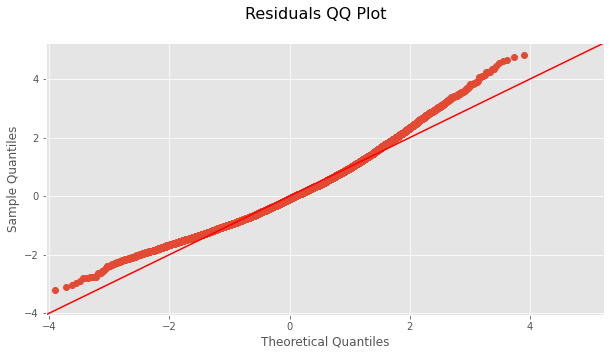

In [152]:
residuals = Model_4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

 # Model Validation

Below, we create train and test data for the x and y variables, use the x subsets to predict new y values, and then calculate the distance between these and the actual y-values. Finally, we use the mean_squared_error function to calculate the MSE for both subsets.

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
#create test and training data subsets
X_train, X_test, y_train, y_test = train_test_split(kcdf, kcdf.price)
train, test = train_test_split(kcdf,test_size=.25,shuffle=True)

In [155]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [156]:
#look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15384, 11) (15384,) (5129, 11) (5129,)


In [157]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [158]:
X_train1= X_train.drop(columns= ['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement','yr_built'])

In [159]:
linreg.fit(X_train1, y_train)

LinearRegression()

In [160]:
LinearRegression()

LinearRegression()

In [161]:
X_test1= X_test.drop(columns= ['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement','yr_built'])

In [162]:
y_hat_train = linreg.predict(X_train1)
y_hat_test = linreg.predict(X_test1)

In [163]:
y_hat_train = linreg.predict(X_train1)
y_hat_test = linreg.predict(X_test1)

In [164]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 2.14597995431184e-18
Test Mean Squared Error:  2.1514436620943857e-18


# Conclusions

Together reading model2 and model_4, sqft_living, grade and bathrooms are the best predictors of a house's price in King County. Homeowners who are interested in selling their homes at a higher price should focus on expanding square footage and improving the quality of construction. When expanding square footage, homeowners should consider building additional bathrooms, as this analysis suggests that number of bathrooms is positively related to price.




The model does have some limitations: given that some of the variables needed to be log-transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. Additionally, given regional differences in housing prices, the model's applicability to data from other counties may be limited. Given that outliers were removed, the model may also not accurately predict extreme values.

Future analysis should explore the best predictors of the prices of homes outside of King County, as well as homes with extreme price values.

# References

* King County House Data Set
* Residual Plots in Python
* sklearn.model_selection.train_test_split